In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/query_result_2025-04-07T12_42_58.736983Z.csv')

<ipython-input-67-bcfd7df24988>:1: DtypeWarning: Columns (11,13,14,15,29,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/query_result_2025-04-07T12_42_58.736983Z.csv')


In [ ]:
df.columns

Index(['ID', 'Gender', 'Comment', 'Type Contact', 'Newsletter', 'Firstname',
       'Lastname', 'Email', 'Created At', 'Updated At', 'Phone',
       'Mobile Phone', 'Phone1', 'Phone2', 'Phone3', 'Phone4', 'Stop Sms1',
       'Stop Sms2', 'Stop Sms3', 'Stop Sms4', 'Contact Admin - Admin → ID',
       'Contact Admin - Admin → Orig ID', 'Contact Admin - Admin → Firstname',
       'Contact Admin - Admin → Lastname', 'Contact Admin - Admin → Email',
       'Contact Admin - Admin → Phone', 'Contact Admin - Admin → Mobile Phone',
       'Contact Admin - Admin → Picture', 'Contact Admin - Admin → Status',
       'Contact Admin - Admin → Email Valide',
       'Contact Admin - Admin → Matricule',
       'Contact Admin - Admin → Numero Rsac',
       'Contact Admin - Admin → Ville Rsac',
       'Contact Admin - Admin → Affichage Rsac',
       'Contact Admin - Admin → Manufacturer ID', 'Groups → Name',
       'Origins → Description'],
      dtype='object')

In [ ]:
import re

def get_most_probable_phone(row):
    phone_columns = ['Phone', 'Mobile Phone', 'Phone1', 'Phone2', 'Phone3', 'Phone4']
    probable_phone = None
    for column in phone_columns:
        if isinstance(row[column], str) and re.search(r'\d{10}', row[column]):  # Vérification basique d'un numéro à 10 chiffres
            probable_phone = row[column]
            break  # Sort de la boucle dès qu'un numéro est trouvé
    return probable_phone

df['most_probable_phone'] = df.apply(get_most_probable_phone, axis=1)

In [ ]:
import re

def clean_column_name(column_name):
    # Remplacer les caractères spéciaux et les espaces par des underscores
    cleaned_name = re.sub(r"[^a-zA-Z0-9]", "_", column_name)
    # Convertir en minuscules
    cleaned_name = cleaned_name.lower()
    return cleaned_name

# Renommer les colonnes
new_column_names = {old_name: clean_column_name(old_name) for old_name in df.columns}
df = df.rename(columns=new_column_names)

In [ ]:
columns_to_drop = [
    'phone',
    'mobile_phone',
    'phone1',
    'phone2',
    'phone3',
    'phone4',
    'stop_sms1',
    'stop_sms2',
    'stop_sms3',
    'stop_sms4',
    'contact_admin___admin___id',
    'contact_admin___admin___orig_id',
    'contact_admin___admin___firstname',
    'contact_admin___admin___lastname',
    'contact_admin___admin___email',
    'contact_admin___admin___phone',
    'contact_admin___admin___mobile_phone',
    'contact_admin___admin___picture',
    'contact_admin___admin___status',
    'contact_admin___admin___email_valide',
    'contact_admin___admin___matricule',
    'contact_admin___admin___numero_rsac',
    'contact_admin___admin___ville_rsac',
    'contact_admin___admin___affichage_rsac',
    'contact_admin___admin___manufacturer_id',
    'type_contact'
]

df = df.drop(columns=columns_to_drop)

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], utc=True)
df['updated_at'] = pd.to_datetime(df['updated_at'], utc=True)

df = df.astype({
    'id': 'string',
    'gender': 'category',
    'comment': 'string',
    'newsletter': 'bool',
    'firstname': 'string',
    'lastname': 'string',
    'email': 'string',
    'created_at': 'datetime64[ns]',
    'updated_at': 'datetime64[ns]',
    'groups___name': 'category',
    'origins___description': 'category',
    'most_probable_phone': 'string'
}, errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   id                     1048575 non-null  string             
 1   gender                 164822 non-null   category           
 2   comment                762867 non-null   string             
 3   newsletter             1048575 non-null  bool               
 4   firstname              329600 non-null   string             
 5   lastname               1048327 non-null  string             
 6   email                  1004760 non-null  string             
 7   created_at             1048575 non-null  datetime64[ns, UTC]
 8   updated_at             152699 non-null   datetime64[ns, UTC]
 9   groups___name          941596 non-null   category           
 10  origins___description  896679 non-null   category           
 11  most_probable_phone    9

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes catégorielles
categorical_columns = df.select_dtypes(include=['category']).columns

# Analyse descriptive pour chaque colonne catégorielle
for column in categorical_columns:
    print(f"Analyse de la colonne '{column}':")
    print(df[column].value_counts())  # Fréquence de chaque catégorie
    print(df[column].value_counts(normalize=True) * 100)  # Pourcentage de chaque catégorie
    print("\n")

    # Graphique à barres pour la distribution des catégories
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f"Distribution des catégories pour '{column}'")
    plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe des x si nécessaire
    plt.tight_layout()
    plt.show()

    # Diagramme circulaire (camembert) pour la proportion des catégories
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Proportion des catégories pour '{column}'")
    plt.ylabel('')  # Masquer l'étiquette de l'axe des y
    plt.show()

                                     Colonne      Type de données  \
id                                        id       string[python]   
gender                                gender             category   
comment                              comment       string[python]   
newsletter                        newsletter                 bool   
firstname                          firstname       string[python]   
lastname                            lastname       string[python]   
email                                  email       string[python]   
created_at                        created_at  datetime64[ns, UTC]   
updated_at                        updated_at  datetime64[ns, UTC]   
groups___name                  groups___name             category   
origins___description  origins___description             category   
most_probable_phone      most_probable_phone       string[python]   

                       Taux de complétion (%)  Valeurs non nulles  
id                                

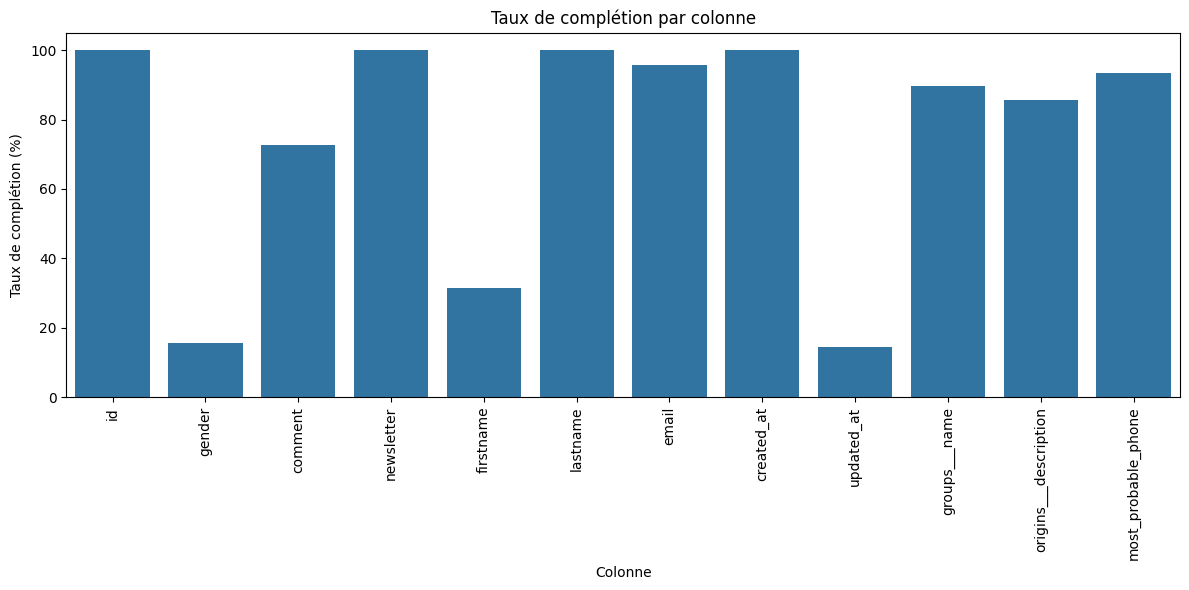

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer le taux de complétion pour chaque colonne
completeness = df.notna().sum() / len(df)

# Créer un DataFrame pour la présentation
presentation_df = pd.DataFrame({
    'Colonne': completeness.index,
    'Type de données': df.dtypes,
    'Taux de complétion (%)': completeness * 100,
    'Valeurs non nulles': df.notna().sum()
})

# Afficher la présentation
print(presentation_df)

# Créer le graphique des taux de complétion
plt.figure(figsize=(12, 6))  # Ajuster la taille de la figure si nécessaire
sns.barplot(x='Colonne', y='Taux de complétion (%)', data=presentation_df)
plt.xticks(rotation=90)  # Faire pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
plt.title('Taux de complétion par colonne')
plt.tight_layout()  # Ajuster la disposition pour éviter les chevauchements
plt.show()

Analyse de la colonne 'gender':
gender
Madame, Monsieur          69096
Monsieur                  39473
Madame                    39233
Société                    7993
Indivision                 2213
Consorts                   1561
Maître                     1343
Succession                 1055
Messieurs                   921
Mademoiselle                792
Mesdames                    527
Mademoiselle, Monsieur      450
Association                 165
Name: count, dtype: int64
gender
Madame, Monsieur          41.921588
Monsieur                  23.948866
Madame                    23.803254
Société                    4.849474
Indivision                 1.342661
Consorts                   0.947082
Maître                     0.814818
Succession                 0.640084
Messieurs                  0.558785
Mademoiselle               0.480518
Mesdames                   0.319739
Mademoiselle, Monsieur     0.273022
Association                0.100108
Name: proportion, dtype: float64




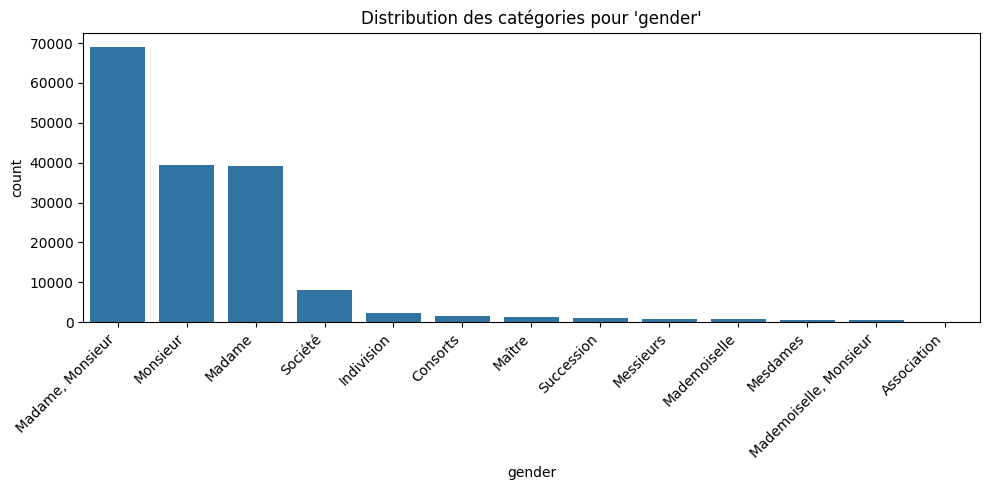

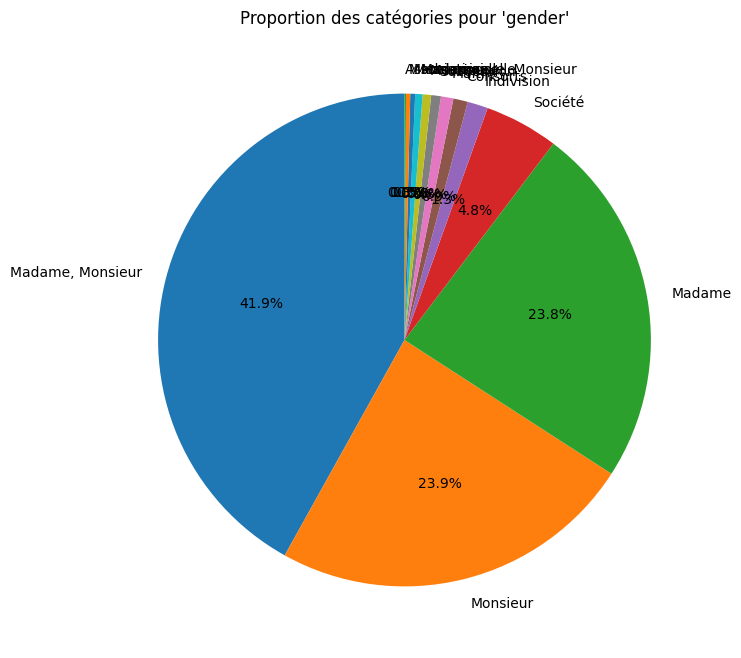

Analyse de la colonne 'groups___name':
groups___name
Demandeur                920775
Vendeur                    9338
Acquéreur Archivé          7333
Vendeur Archivé            1828
A Supprimer                1674
Locataire Archivé           289
Acquéreur Signé             206
Propriétaire-Bailleur        87
Locataire                    66
Name: count, dtype: int64
groups___name
Demandeur                97.788754
Vendeur                   0.991720
Acquéreur Archivé         0.778784
Vendeur Archivé           0.194138
A Supprimer               0.177783
Locataire Archivé         0.030693
Acquéreur Signé           0.021878
Propriétaire-Bailleur     0.009240
Locataire                 0.007009
Name: proportion, dtype: float64




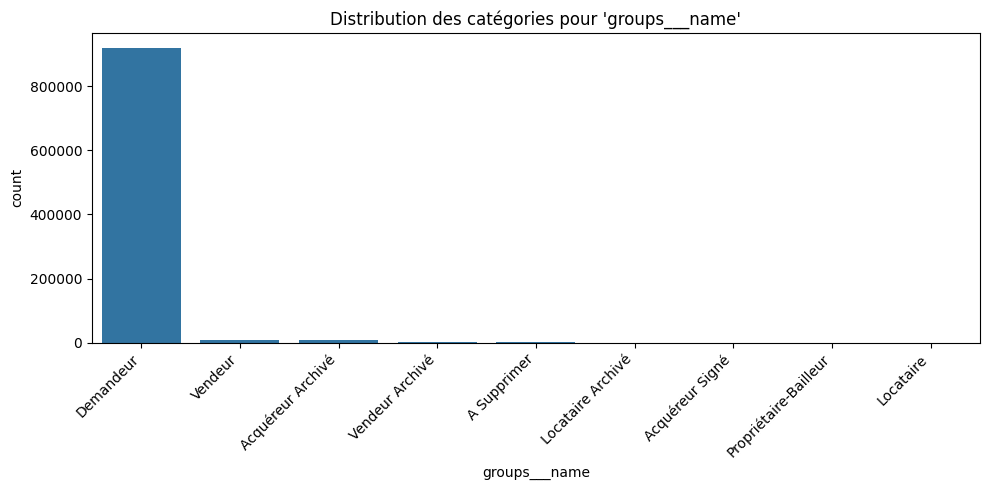

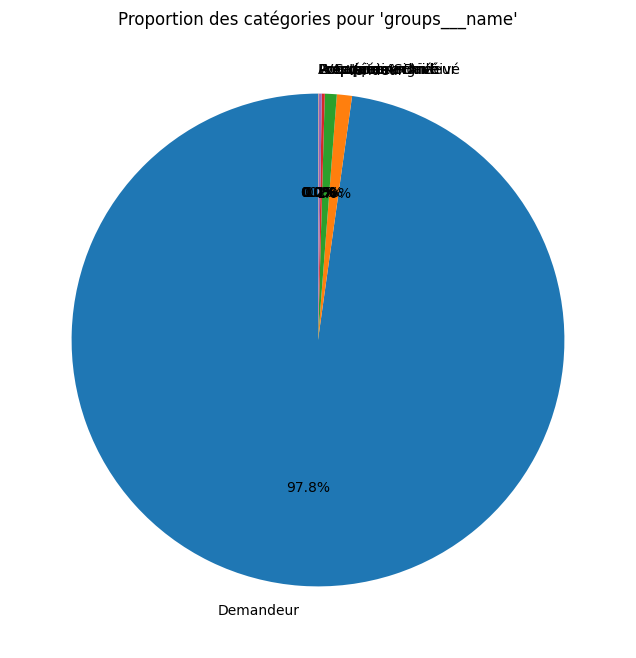

Analyse de la colonne 'origins___description':
origins___description
UNKNOWN                    496832
Le Bon Coin                284516
Bien Ici                    77441
Ouest France (Internet)     14721
AvendreAlouer                6881
Green-Acres                  3586
Ancien client                1166
Annonce SeLoger              1124
Relation Conseiller          1092
Bouche à oreille             1007
Paradissimmo                 1001
Pige                          746
Recommandation client         674
Relation Perso Négo           665
Apporteur                     613
Contact téléphonique          586
Belles Demeures               584
Ancien acquéreur              537
proprietes-privees            537
Prospection                   479
Ancien vendeur                404
Demarchage                    364
Porte à porte                 249
Panneau A vendre/ Vendu       223
Estimation                    163
Notaire                       130
Intercabinet                  111
Linkedin     

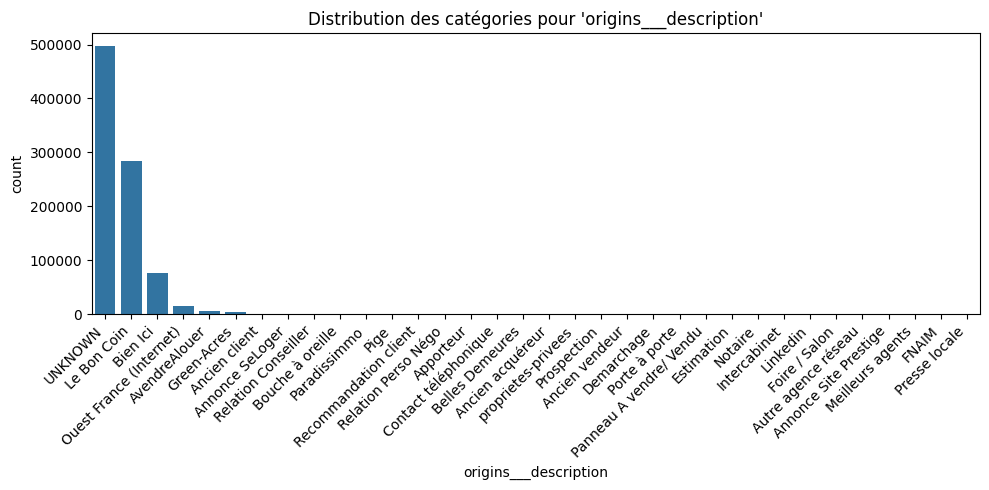

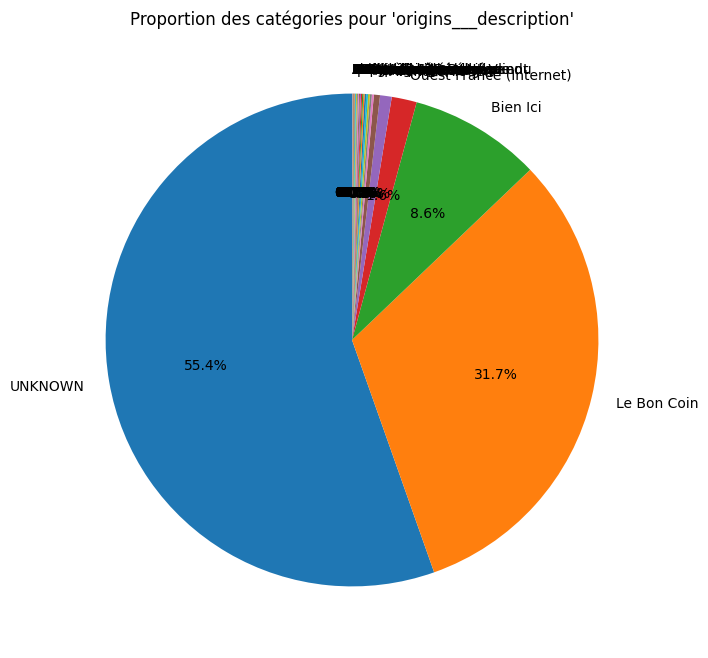

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes catégorielles
categorical_columns = df.select_dtypes(include=['category']).columns

# Analyse descriptive pour chaque colonne catégorielle
for column in categorical_columns:
    print(f"Analyse de la colonne '{column}':")
    print(df[column].value_counts())  # Fréquence de chaque catégorie
    print(df[column].value_counts(normalize=True) * 100)  # Pourcentage de chaque catégorie
    print("\n")

    # Graphique à barres pour la distribution des catégories
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f"Distribution des catégories pour '{column}'")
    plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe des x si nécessaire
    plt.tight_layout()
    plt.show()

    # Diagramme circulaire (camembert) pour la proportion des catégories
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Proportion des catégories pour '{column}'")
    plt.ylabel('')  # Masquer l'étiquette de l'axe des y
    plt.show()